**Introducción a las redes neuronales y su aplicación en Geociencia**  by Karen Cruz in licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

# Implementación de una Regresión 


> ## Descripción del Problema

El objetivo principal es utilizar estos datos para **predecir cuánta impureza hay en el concentrado de mineral.**

 Como esta impureza se mide cada hora, si podemos predecir cuánta sílice (impureza) hay en el concentrado de mineral, podemos ayudar a los ingenieros, brindándoles información temprana para tomar acciones. Por lo tanto, podrán tomar acciones correctivas por adelantado (reducir la impureza, si es el caso) y también ayudar al medio ambiente (reducir la cantidad de mineral que va a los relaves a medida que reduce la sílice en el concentrado de mineral).

 [Predicción de impureza](https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process)

> ## Análisis de la Base de Datos

La primera columna muestra la hora y el rango de fechas (desde marzo de 2017 hasta septiembre de 2017). Algunas columnas se muestrearon cada 20 segundos. Otros fueron muestreados por horas.

La segunda y tercera columnas son medidas de calidad de la pulpa de mineral de hierro justo antes de que se alimente a la planta de flotación. 

La columna 4 hasta la columna 8 son las variables más importantes que impactan en la calidad del mineral al final del proceso. Desde la columna 9 hasta la columna 22, podemos ver los datos del proceso (nivel y flujo de aire dentro de las columnas de flotación, que también impactan en la calidad del mineral. Las dos últimas columnas son la medición final de la calidad de la pulpa de mineral de hierro del laboratorio.)


El objetivo es predecir la última columna, que es el porcentaje de sílice en el concentrado de mineral de hierro.


<font size=4>Pandas es una biblioteca de Python que facilita el análisis de datos. 
 
<font size=4>Pandas trabaja con dos tipos de objetos principales: **DataFrame** y **Serie**.

<font size=4>Un **DataFrame** es como una tabla y una **serie** es como una columna. 

<font size=4>La sintaxis para declarar a un **DataFrame** es declarando un diccionario, en donde las palabras clave seran el nombre de las columnas y los valores serán el listado de entradas para la columna dada. 



<font size=4 color='indianred'>
    
> ## Leer un archivo de datos.

<font size=4> Un archivo csv es una tabla de valores separadas por comas ("Comma-Separated-Values").

<font size=4>Usando la siguiente función, Pandas nos permite leer archivos csv e interpretarlo como un **DataFrame**:

<font size=4>csv ------------> **pd.read_csv(** file_name **)** --------------> DataFrame

___


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install pandas==0.25.2

In [ ]:
import pandas as pd
#pd.__version__

In [ ]:
df = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv', decimal=',')

<font size=4>[read_csv( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [ ]:
df

<font size=4>   
El atributo  **shape** regresa el numero de datos por el numero de columnas: (#records, #column)

In [ ]:
df.shape

(737453, 24)

In [ ]:
df=df.iloc[:10000, 1:]

In [ ]:
df.shape

(10000, 23)

<font size=4>Los metodos **head()** y **tail()** permiten ver los primeros 5 y los ultimos 5 renglones, respectivamente. 

<font size=4>También se puede especificar dentro de los paréntesis el numero de renglones a ver. 

In [ ]:
#data.head()
df.tail(15)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
9985,58.82,11.46,3566.99,498.657,399.668,9.70693,1.74334,247.566,247.961,249.170,295.096,306.4,249.763,249.258,447.687,447.520,477.878,353.596,473.618,448.610,475.067,65.78,2.43
9986,58.82,11.46,3572.85,501.648,396.797,9.70610,1.74369,246.863,248.994,249.324,295.096,306.4,249.829,250.159,434.124,449.612,480.686,439.685,485.621,431.187,471.868,65.78,2.43
9987,58.82,11.46,3580.86,504.639,401.426,9.70528,1.74403,246.995,247.192,249.390,295.096,306.4,250.137,252.180,445.685,456.639,472.377,468.513,481.325,409.736,453.878,65.78,2.43
9988,58.82,11.46,3616.21,507.080,400.020,9.70445,1.74438,247.500,248.071,249.082,295.096,306.4,250.115,250.291,449.288,466.094,483.814,481.953,505.120,467.871,469.433,65.78,2.43
9989,58.82,11.46,3666.41,505.249,396.182,9.70362,1.74472,247.324,245.500,250.796,295.096,306.4,249.895,249.170,459.148,478.892,471.942,490.939,502.034,505.282,477.600,65.78,2.43
9990,58.82,11.46,3667.97,502.869,395.625,9.70280,1.74507,247.500,253.806,251.741,295.096,306.4,249.675,250.247,469.558,462.126,450.038,487.113,508.976,483.778,484.998,65.78,2.43
9991,58.82,11.46,3670.31,508.301,396.416,9.70197,1.74541,247.170,251.653,251.653,295.096,306.4,249.763,252.092,450.590,444.398,412.704,484.490,487.053,451.914,467.835,65.78,2.43
9992,58.82,11.46,3669.73,511.719,399.756,9.70115,1.74576,246.819,245.105,251.433,295.096,306.4,250.137,250.378,438.628,442.249,404.555,586.094,512.721,435.170,459.837,65.78,2.43
9993,58.82,11.46,3637.89,512.512,402.715,9.70033,1.74610,248.291,245.457,249.983,295.096,306.4,249.961,249.390,432.522,445.310,407.576,599.611,512.174,419.259,453.604,65.78,2.43
9994,58.82,11.46,3666.02,510.132,396.650,9.69950,1.74645,248.027,249.082,249.082,295.096,306.4,250.291,250.005,443.383,450.292,414.697,586.993,504.293,438.583,458.126,65.78,2.43


<font size=4> Se puede notar que para cada columna se tienen diferentes ordenes de magnitud, por lo que es importante normalizar cada una de ellas para que se encuentren en el mismo rango, de lo contrario el modelo estará sesgado.

In [ ]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,57.856112,12.806148,3455.493258,503.862121,399.811736,9.970999,1.741488,250.062145,250.082778,250.052360,2.950960e+02,3.064000e+02,250.078870,250.053197,517.116743,518.598245,517.424186,494.484680,513.676650,521.093523,513.231428,65.763122,2.510592
std,2.206352,3.931974,1125.980028,91.495843,6.224821,0.250178,0.044562,2.004042,4.489379,1.681614,5.758526e-11,5.565249e-11,1.758805,1.614940,52.385866,113.668490,53.977752,100.340552,66.033471,57.673370,63.904699,1.205487,1.225186
min,54.950000,8.250000,12.207000,247.070000,376.274000,9.286950,1.519830,227.197000,178.374000,210.938000,2.950960e+02,3.064000e+02,240.381000,244.380000,376.968000,210.986000,336.734000,162.439000,188.943000,194.453000,206.107000,62.830000,1.090000
25%,55.200000,8.980000,3007.322500,441.650000,396.299000,9.819820,1.740000,248.577000,248.126000,249.170000,2.950960e+02,3.064000e+02,249.675000,249.082000,456.445000,452.901000,457.404750,448.295750,458.417750,465.130000,462.641750,65.120000,1.490000
50%,58.840000,11.460000,3405.420000,541.626000,399.902000,9.974000,1.750000,249.829000,250.102500,250.005000,2.950960e+02,3.064000e+02,250.071000,250.005000,542.358000,542.771500,542.477500,533.807500,535.635000,537.478000,527.480000,66.160000,2.120000
75%,59.890000,17.160000,3871.287500,565.628250,403.418000,10.153725,1.763240,251.609000,252.070000,250.950000,2.950960e+02,3.064000e+02,250.455000,250.840000,553.690000,554.961250,553.688000,555.487000,555.961000,559.759000,557.973000,66.680000,3.420000
max,60.660000,17.400000,6250.000000,650.513000,418.623000,10.472200,1.790000,261.255000,325.525000,286.677000,2.950960e+02,3.064000e+02,260.299000,257.739000,859.914000,828.766000,869.058000,680.023000,675.474000,698.390000,659.378000,67.600000,5.360000


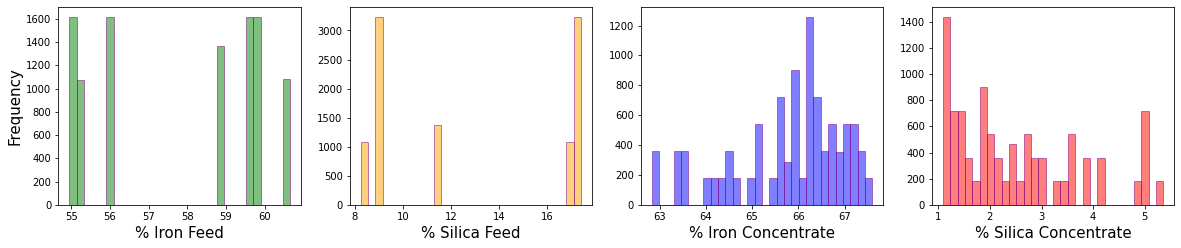

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df['% Iron Feed'], bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('% Iron Feed', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df['% Silica Feed'], bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('% Silica Feed', size=15)

ax3.hist(df['% Iron Concentrate'], bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('% Iron Concentrate', size=15)

ax4.hist(df['% Silica Concentrate'], bins=30, color='red',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('% Silica Concentrate', size=15);

<font size=4> Quitamos el sesgo del orden, en caso de que este exista:

In [ ]:
import numpy as np

np.random.seed(1)

df = df.sample(frac=1)

In [ ]:
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

print(df_train.shape)
print(df_test.shape)

(9000, 23)
(1000, 23)


<font size=4>
Para trabajar con los modelos, se requiere que todas las variables tengan el mismo orden de magnitud. Por este motivo, sus valores se normalizan en las muestras que se van a utilizar en el entrenamiento, tanto las características (X) como el objetivo (Y):

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

In [ ]:
df_train_norm = (df_train - df_train.mean()) / df_train.std()
df_test_norm = (df_test - df_train.mean()) / df_train.std()

In [ ]:
df_test_norm.head(10)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
7031,0.822677,-0.949786,0.201481,-0.169631,0.246566,-0.879253,0.064040,1.033150,-0.648330,-0.752706,0.999944,0.999944,-0.489964,-0.934109,0.781239,-0.179651,0.396957,0.636576,0.612282,0.460540,0.637959,-0.151773,-0.122107
9842,0.441892,-0.347301,0.574253,0.018563,-1.784957,-1.010626,-0.162158,-0.052249,-0.827957,0.796204,0.999944,0.999944,0.091776,-1.194027,-1.183987,-0.813735,-0.915902,-2.368910,-2.636447,-1.318860,-2.562216,0.113262,-0.089497
5807,0.926939,-0.977749,-2.681813,0.453010,-0.208047,-1.395047,-4.792541,1.482780,-1.804705,-0.143405,0.999944,0.999944,-0.114850,-0.018798,0.099222,2.602650,1.517364,1.591292,2.403545,1.832026,1.674626,-0.507915,0.375207
4969,1.275992,-1.163325,-0.440007,-1.958130,1.008147,1.125419,0.313637,1.252725,0.286759,0.517801,0.999944,0.999944,-0.890123,0.131681,0.438788,0.228876,0.672307,-0.938616,-0.779214,0.632926,-0.551427,-1.245046,0.676856
7019,0.822677,-0.949786,0.145934,-0.084205,1.015186,-0.924388,0.156302,0.419338,0.744561,1.113536,0.999944,0.999944,1.336084,0.650896,0.406259,1.673474,0.309002,0.622461,0.411277,0.409987,0.341402,-0.151773,-0.122107
6387,0.926939,-0.977749,-0.050304,-2.142650,-1.533926,-1.784336,0.105268,0.956299,-1.014975,-1.666363,0.999944,0.999944,-1.453079,-0.408054,0.949102,1.804162,0.321432,0.895598,1.892015,1.322952,0.947839,0.370016,-0.806933
6156,0.926939,-0.977749,-1.126706,0.413637,0.002943,-1.766538,0.192404,0.057539,0.828103,0.828645,0.999944,0.999944,1.686153,1.142752,0.380439,-2.253509,0.580944,0.696474,0.718646,-0.065946,-0.006202,0.585357,-0.749864
9352,0.450959,-0.347301,-0.506486,0.688252,1.036301,-0.708053,0.532927,0.177806,0.385308,0.219344,0.999944,0.999944,0.360446,-1.050388,-0.884098,-0.576715,-1.338134,-0.498075,-1.029227,-0.568117,-0.658564,-0.499633,0.212153
6548,0.926939,-0.977749,-0.575747,-0.129591,-1.312748,-1.373577,0.178142,-1.653150,0.237485,-0.260193,0.999944,0.999944,-0.640237,-0.005118,1.237504,2.039732,0.564827,0.583655,0.629906,0.868438,1.177920,0.535663,-0.562352
7241,0.822677,-0.949786,0.102971,-1.841345,-3.619726,0.223129,-0.030451,1.910452,-0.599056,-2.398349,0.999944,0.999944,-0.515009,-0.961468,-2.536057,0.630898,-0.264706,1.079082,1.886131,0.805311,0.484409,0.370016,-0.554200


In [ ]:
train_x = df_train_norm.values[:,:-1]
train_y = df_train_norm.values[:,-1:]

test_x = df_test_norm.values[:,:-1]
test_y = df_test_norm.values[:,-1:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(9000, 22)
(9000, 1)
(1000, 22)
(1000, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Activation
from keras.optimizers import SGD
from keras.models import Model
from keras.utils import plot_model
from keras import initializers
from keras import optimizers
import tensorflow as tf

In [ ]:
np.random.seed(1)
n_x = train_x.shape[1] 
n_y = train_y.shape[1]

input_nodes = n_x     # The input layer has n_x nodes
output_nodes = n_y    # The output layer has n_y nodes

linear_model = Sequential()

# For the first layer, you need to indicate its input layer, which corresponds to
# the input layer of the network.

linear_model.add(Dense(output_nodes,  kernel_initializer='uniform', bias_initializer='zeros', \
                input_dim=input_nodes, activation='linear'))

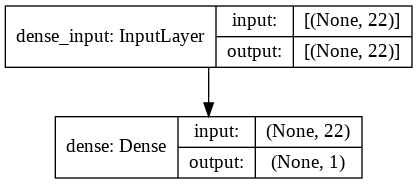

In [ ]:
plot_model(linear_model, to_file='linear_model.png', show_shapes=True, rankdir='TB', 
           expand_nested=True, show_layer_names=True, dpi=96)

In [ ]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 23        
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = optimizers.SGD(lr=0.001, momentum=0.0, nesterov=False)

linear_model.compile(loss='mean_squared_error', optimizer=sgd)

El numero de epocas hace la diferencia (casi siempre)

In [ ]:
# 10 % of the training data will be used to validate the training
validation_portion = 0.1
epochs = 100

history = linear_model.fit(train_x, train_y, epochs=epochs, validation_split = validation_portion, verbose=1)

# the "history" object contains the information generated during the training

Epoch 1/100
254/254 [==============================] - 1s 2ms/step - loss: 0.7714 - val_loss: 0.3524
Epoch 2/100
254/254 [==============================] - 0s 1ms/step - loss: 0.3228 - val_loss: 0.2182
Epoch 3/100
254/254 [==============================] - 0s 1ms/step - loss: 0.2006 - val_loss: 0.1543
Epoch 4/100
254/254 [==============================] - 0s 1ms/step - loss: 0.1477 - val_loss: 0.1204
Epoch 5/100
254/254 [==============================] - 0s 1ms/step - loss: 0.1172 - val_loss: 0.1016
Epoch 6/100
254/254 [==============================] - 0s 1ms/step - loss: 0.0997 - val_loss: 0.0911
Epoch 7/100
254/254 [==============================] - 0s 1ms/step - loss: 0.0904 - val_loss: 0.0851
Epoch 8/100
254/254 [==============================] - 0s 1ms/step - loss: 0.0802 - val_loss: 0.0813
Epoch 9/100
254/254 [==============================] - 0s 1ms/step - loss: 0.0807 - val_loss: 0.0791
Epoch 10/100
254/254 [==============================] - 0s 1ms/step - loss: 0.0785 - val_lo

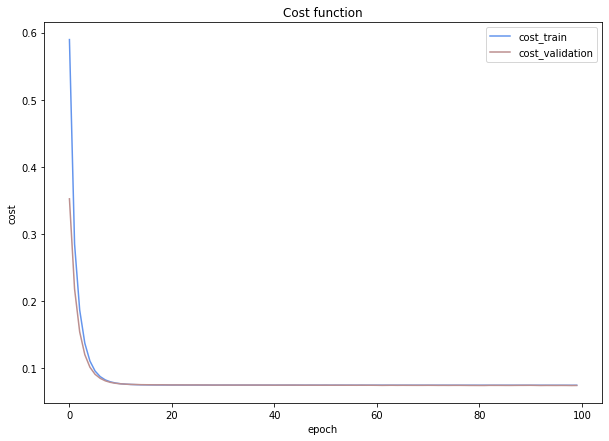

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(history.history['loss'], color='cornflowerblue')
plt.plot(history.history['val_loss'], color='rosybrown')
plt.title('Cost function')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend(['cost_train', 'cost_validation'])
plt.show()